In [76]:
import numpy as np

def k_means(data, cluster):
    idd = 0
    while idd < 5:
        idd += 1
        print("Iteration =", idd)
        
        dis = []
        assi = []
        
        for i in data:
            distances = []
            for j in cluster:
                dis1 = np.sqrt((i[0] - j[0])**2 + (i[1] - j[1])**2)
                distances.append(dis1)
            dis.append(distances)
            distances = np.array(distances)
            assign = np.argmin(distances)
            assi.append(assign)
        
        group = {}
        for i in range(len(cluster)):  
            cluster_points = [data[j] for j in range(len(data)) if assi[j] == i]
            group[i] = cluster_points
        
        new_clusters = []
        for i in group.values():
            if len(i) > 0:
                points = np.array(i)
                mean = np.mean(points, axis=0)  
                mean = np.round(mean)  
                new_clusters.append(mean.tolist())
        
        #print("Cluster Centroids = ", cluster)
        #print("Assignments = ", assi)
        print("Groups = ", group)
        print("New Centroids = ", new_clusters)
        
        if np.allclose(cluster, new_clusters):
            break
        else:
            cluster = new_clusters
        
        print("\n")
    
    return cluster, assi ,group




In [77]:
data = [(1,2), (2,6), (12,10), (3,10), (3,8), (14,9), (4,6), (15,10),
        (6,9), (6,11), (6,5), (7,5), (15,4), (7,2), (15,18), (4,7)]

initial_clusters = [(1,2), (2,6), (12,10)]  

final_clusters, final_assignment, final_group = k_means(data, initial_clusters)
print()
print("Final Clusters:", final_clusters)
print("Final Assignment of points:", final_assignment)
#plot_clusters(data, initial_clusters, final_clusters)

Iteration = 1
Groups =  {0: [(1, 2), (7, 2)], 1: [(2, 6), (3, 10), (3, 8), (4, 6), (6, 9), (6, 5), (7, 5), (4, 7)], 2: [(12, 10), (14, 9), (15, 10), (6, 11), (15, 4), (15, 18)]}
New Centroids =  [[4.0, 2.0], [4.0, 7.0], [13.0, 10.0]]


Iteration = 2
Groups =  {0: [(1, 2), (7, 2)], 1: [(2, 6), (3, 10), (3, 8), (4, 6), (6, 9), (6, 11), (6, 5), (7, 5), (4, 7)], 2: [(12, 10), (14, 9), (15, 10), (15, 4), (15, 18)]}
New Centroids =  [[4.0, 2.0], [5.0, 7.0], [14.0, 10.0]]


Iteration = 3
Groups =  {0: [(1, 2), (7, 2)], 1: [(2, 6), (3, 10), (3, 8), (4, 6), (6, 9), (6, 11), (6, 5), (7, 5), (4, 7)], 2: [(12, 10), (14, 9), (15, 10), (15, 4), (15, 18)]}
New Centroids =  [[4.0, 2.0], [5.0, 7.0], [14.0, 10.0]]

Final Clusters: [[4.0, 2.0], [5.0, 7.0], [14.0, 10.0]]
Final Assignment of points: [0, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1]


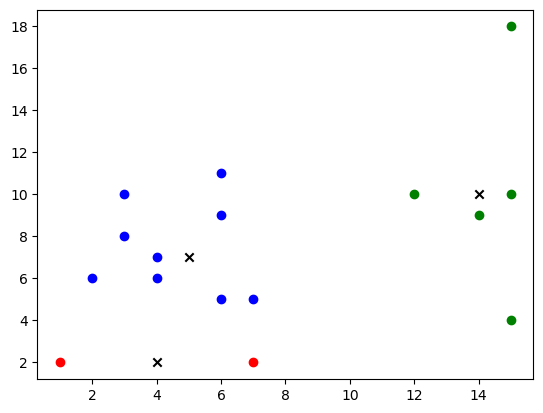

In [78]:
import matplotlib.pyplot as plt
k=['red','blue','green','indigo']
j=0
for x in final_group.values():
  for i in x:
    plt.scatter(x=i[0],y=i[1],color=k[j])
  j+=1
j=0
for i in final_clusters:
    plt.scatter(x=i[0],y=i[1],marker="x",color="black")
    j+=1
plt.show()

In [79]:
from scipy.spatial.distance import cdist

within_cluster_distances= np.sum(np.min(cdist(data, final_clusters, 'euclidean'), axis=1))
print("WITHIN CLUSTER DISTANCE=",within_cluster_distances)

WITHIN CLUSTER DISTANCE= 46.98679945946545


In [80]:
ii=1
for i in final_clusters:
    iii=1
    for j in final_clusters:
        if i!=j:
            dis1 = np.sqrt((i[0] - j[0])**2 + (i[1] - j[1])**2)
            print("DISTANCE BETWEEN CLUSTER ",ii,"CLUSTER ",iii," IS",dis1)
        iii+=1
    ii+=1

DISTANCE BETWEEN CLUSTER  1 CLUSTER  2  IS 5.0990195135927845
DISTANCE BETWEEN CLUSTER  1 CLUSTER  3  IS 12.806248474865697
DISTANCE BETWEEN CLUSTER  2 CLUSTER  1  IS 5.0990195135927845
DISTANCE BETWEEN CLUSTER  2 CLUSTER  3  IS 9.486832980505138
DISTANCE BETWEEN CLUSTER  3 CLUSTER  1  IS 12.806248474865697
DISTANCE BETWEEN CLUSTER  3 CLUSTER  2  IS 9.486832980505138
